# Snow Cover Time Series Analysis

## Clipping all files

In [72]:
def ClipAll(infol,shpin,outfol):
    
    """Parameters are infol = path to input folder, shpin = path to input shape file, outfol = path to folder for clipped rasters

    Usage Example :-
    
    ClipAll(infol = r"D:\\Landsat\\Study Area", shpin = r"D:\\Study Area\\Study.shp", outfol = r"D:\\Study Area\\Clipped Output")
    
    use help(ClipAll) for clearer details
    
    """
    
    from osgeo import gdal
    import glob
    import datetime
    from tqdm import tqdm
    
    start_time = datetime.datetime.now()
    infiles = glob.glob(infol + "\\*.tif") 
    
    for i in tqdm(range(len(infiles))):
        split = infiles[i].split("\\")
        outfilename = split[-1][:-4]
        dsclip=gdal.Warp(destNameOrDestDS = outfol + '\\' + outfilename + '_clip' + '.tif',
                         srcDSOrSrcDSTab = infiles[i],
                         cutlineDSName=shpin,
                         cropToCutline=True,
                         dstNodata = 0)
        dsclip = None
        
    end_time = datetime.datetime.now()
    
    time_taken = end_time - start_time
    
    output = str(len(infiles))+" Files Successfully Clipped !!" + "\nTime Taken was " + str(time_taken)
    
    return(output)

In [133]:
ClipAll(r'E:\Rachit\Snow\2014',r'E:\\Rachit\\Snow\\Snow_boundary\\NWH_states_dissolve.shp',r'E:\Rachit\Snow\2014\clipped')

100%|██████████| 30/30 [00:24<00:00,  1.22it/s]


'30 Files Successfully Clipped !!\nTime Taken was 0:00:24.642383'

# plotting

In [1]:
import pandas as pd
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [144]:
import glob
folder1 = glob.glob('E:\\Rachit\\Snow\\DecJan2015-24\\2023-24\\*.tif')
folder2 = glob.glob('E:\\Rachit\\Snow\\DecJan2015-24\\2022-23\\*.tif')
folder3 = glob.glob('E:\\Rachit\\Snow\\DecJan2015-24\\2021-22\\*.tif')
folder4 = glob.glob('E:\\Rachit\\Snow\\DecJan2015-24\\2020-21\\*.tif')
folder5 = glob.glob('E:\\Rachit\\Snow\\DecJan2015-24\\2019-20\\*.tif')
folder6 = glob.glob('E:\\Rachit\\Snow\\DecJan2015-24\\2018-19\\*.tif')
folder7 = glob.glob('E:\\Rachit\\Snow\\DecJan2015-24\\2017-18\\*.tif')
folder8 = glob.glob('E:\\Rachit\\Snow\\DecJan2015-24\\2016-17\\*.tif')
folder9 = glob.glob('E:\\Rachit\\Snow\\DecJan2015-24\\2015-16\\*.tif')
folder10 = glob.glob('E:\\Rachit\\Snow\\DecJan2015-24\\2014-15\\*.tif')
dates = ['Dec1', 'Dec2', 'Dec3', 'Dec4', 'Dec5',
 
 'Dec6',

 'Dec7',

 'Dec8',

 'Dec9',

 'Dec10',

 'Dec11',

 'Dec12',

 'Dec13',

 'Dec14',

 'Dec15',

 'Dec16',

 'Dec17',

 'Dec18',

 'Dec19',

 'Dec20',

 'Dec21',

 'Dec22',

 'Dec23',

 'Dec24',

 'Dec25',

 'Dec26',

 'Dec27',
 
 'Dec28',

 'Dec29',

 'Dec30',
 
 'Dec31', 'Jan1', 'Jan2', 'Jan3', 'Jan4', 'Jan5', 
 'Jan6',
 
 'Jan7',
 
 'Jan8',
 
 'Jan9',
 
 'Jan10',
 
 'Jan11',
 
 'Jan12',

 'Jan13',

 'Jan14',
 
 'Jan15',

 'Jan16',
 
 'Jan17',

 'Jan18',

 'Jan19',

 'Jan20',
 
 'Jan21',
 
 'Jan22',

 'Jan23',

 'Jan24',
 
 'Jan25',

 'Jan26',
 
 'Jan27',

 'Jan28',

 'Jan29',

 'Jan30',
 
 'Jan31']
# for i in range(1,32):
#     decday = f'Dec{i}:'
#     dates.append(decday)
#     janday = f'Jan{i}'
#     dates.append(janday)
# dates

In [102]:
snowarea1= []
def snowcoverarea1(path):
    tiff1 = gdal.Open(path)
#     lulc.GetProjection() 
    tiffilearr1 = tiff1.ReadAsArray()
    allpixels1 = (tiffilearr1 == 1) + (tiffilearr1 == 2) + (tiffilearr1 == 3) + (tiffilearr1 == 4)
    snowpixels1 = tiffilearr1 == 4      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    snow1 = np.extract(snowpixels1, tiffilearr1)
    totalarea1 = np.extract(allpixels1, tiffilearr1)
    area1 = (len(snow1)*1*1 ) / len(totalarea1) #since the spatial resolution of ims snow data is 1m
    
    print(f'relative snow covered area in the NWH: {area1} km\u00b2') 
    snowarea1.append(area1)


In [103]:
snowarea2= []
def snowcoverarea2(path):
    tiff2 = gdal.Open(path)
#     lulc.GetProjection() 
    tiffilearr2 = tiff2.ReadAsArray()
    allpixels2 = (tiffilearr2 == 1) + (tiffilearr2 == 2) + (tiffilearr2 == 3) + (tiffilearr2 == 4)
    snowpixels2 = tiffilearr2 == 4      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    snow2 = np.extract(snowpixels2, tiffilearr2)
    totalarea2= np.extract(allpixels2, tiffilearr2)
    area2 = (len(snow2)*1*1 ) / len(totalarea2) #since the spatial resolution of ims snow data is 1m
    
    print(f'relative snow covered area in the NWH: {area2} km\u00b2') 
    snowarea2.append(area2)

In [104]:
snowarea3= []
def snowcoverarea3(path):
    tiff3 = gdal.Open(path)
#     lulc.GetProjection() 
    tiffilearr3 = tiff3.ReadAsArray()
    allpixels3 = (tiffilearr3 == 1) + (tiffilearr3 == 2) + (tiffilearr3 == 3) + (tiffilearr3 == 4)
    snowpixels3 = tiffilearr3 == 4      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    snow3 = np.extract(snowpixels3, tiffilearr3)
    totalarea3 = np.extract(allpixels3, tiffilearr3)
    area3 = (len(snow3)*1*1 ) / len(totalarea3) #since the spatial resolution of ims snow data is 1m
    
    print(f'relative snow covered area in the NWH: {area3}') 
    snowarea3.append(area3)

In [105]:
snowarea4= []
def snowcoverarea4(path):
    tiff4 = gdal.Open(path)
#     lulc.GetProjection() 
    tiffilearr4 = tiff4.ReadAsArray()
    allpixels4 = (tiffilearr4 == 1) + (tiffilearr4 == 2) + (tiffilearr4 == 3) + (tiffilearr4 == 4)
    snowpixels4 = tiffilearr4 == 4      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    snow4 = np.extract(snowpixels4, tiffilearr4)
    totalarea4 = np.extract(allpixels4, tiffilearr4)
    area4 = (len(snow4)*1*1 ) / len(totalarea4) #since the spatial resolution of ims snow data is 1m
    
    print(f'relative snow covered area in the NWH: {area4}') 
    snowarea4.append(area4)

In [106]:
snowarea5= []
def snowcoverarea5(path):
    tiff5 = gdal.Open(path)
#     lulc.GetProjection() 
    tiffilearr5 = tiff5.ReadAsArray()
    allpixels5 = (tiffilearr5 == 1) + (tiffilearr5 == 2) + (tiffilearr5 == 3) + (tiffilearr5 == 4)
    snowpixels5 = tiffilearr5 == 4      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    snow5 = np.extract(snowpixels5, tiffilearr5)
    totalarea5 = np.extract(allpixels5, tiffilearr5)
    area5 = (len(snow5)*1*1 ) / len(totalarea5) #since the spatial resolution of ims snow data is 1m
    
    print(f'relative snow covered area in the NWH: {area5} ') 
    snowarea5.append(area5)

In [107]:
snowarea6= []
def snowcoverarea6(path):
    tiff6 = gdal.Open(path)
#     lulc.GetProjection() 
    tiffilearr6 = tiff6.ReadAsArray()
    allpixels6 = (tiffilearr6 == 1) + (tiffilearr6 == 2) + (tiffilearr6 == 3) + (tiffilearr6 == 4)
    snowpixels6 = tiffilearr6 == 4      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    snow6 = np.extract(snowpixels6, tiffilearr6)
    totalarea6 = np.extract(allpixels6, tiffilearr6)
    area6 = (len(snow6)*1*1 ) / len(totalarea6) #since the spatial resolution of ims snow data is 1m
    
    print(f'relative snow covered area in the NWH : {area6}') 
    snowarea6.append(area6)

In [108]:
snowarea7= []
def snowcoverarea7(path):
    tiff7 = gdal.Open(path)
#     lulc.GetProjection() 
    tiffilearr7 = tiff7.ReadAsArray()
    allpixels7 = (tiffilearr7 == 1) + (tiffilearr7 == 2) + (tiffilearr7 == 3) + (tiffilearr7 == 4)
    snowpixels7 = tiffilearr7 == 4      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    snow7 = np.extract(snowpixels7, tiffilearr7)
    totalarea7 = np.extract(allpixels7, tiffilearr7)
    area7 = (len(snow7)*1*1 ) / len(totalarea7) #since the spatial resolution of ims snow data is 1m
    
    print(f'relative snow covered area in the NWH: {area7}') 
    snowarea7.append(area7)

In [109]:
snowarea8= []
def snowcoverarea8(path):
    tiff8 = gdal.Open(path)
#     lulc.GetProjection() 
    tiffilearr8 = tiff8.ReadAsArray()
    allpixels8 = (tiffilearr8 == 1) + (tiffilearr8 == 2) + (tiffilearr8== 3) + (tiffilearr8 == 4)
    snowpixels8 = tiffilearr8 == 4      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    snow8 = np.extract(snowpixels8, tiffilearr8)
    totalarea8 = np.extract(allpixels8, tiffilearr8)
    area8 = (len(snow8)*1*1 ) / len(totalarea8) #since the spatial resolution of ims snow data is 1m
    
    print(f'relative snow covered area in the NWH: {area8} ') 
    snowarea8.append(area8)

In [110]:
snowarea9= []
def snowcoverarea9(path):
    tiff9 = gdal.Open(path)
#     lulc.GetProjection() 
    tiffilearr9 = tiff9.ReadAsArray()
    allpixels9 = (tiffilearr9 == 1) + (tiffilearr9 == 2) + (tiffilearr9 == 3) + (tiffilearr9 == 4)
    snowpixels9 = tiffilearr9 == 4      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    snow9 = np.extract(snowpixels9, tiffilearr9)
    totalarea9 = np.extract(allpixels9, tiffilearr9)
    area9 = (len(snow9)*1*1 ) / len(totalarea9) #since the spatial resolution of ims snow data is 1m
    
    print(f'relative snow covered area in the NWH : {area9}') 
    snowarea9.append(area9)

In [111]:
snowarea10= []
def snowcoverarea10(path):
    tiff10 = gdal.Open(path)
#     lulc.GetProjection() 
    tiffilearr10 = tiff10.ReadAsArray()
    allpixels10 = (tiffilearr10 == 1) + (tiffilearr10 == 2) + (tiffilearr10 == 3) + (tiffilearr10 == 4)
    snowpixels10 = tiffilearr10 == 4      
    
    # 7 value is allocated to pixels in built area class in Sentinel-2 10m Land Use/Land Cover timeseries  
    
    snow10 = np.extract(snowpixels10, tiffilearr10)
    totalarea10 = np.extract(allpixels10, tiffilearr10)
    area10 = (len(snow10)*1*1 ) / len(totalarea10) #since the spatial resolution of ims snow data is 1m
    
    print(f'relative snow covered area in the NWH: {area10} ') 
    snowarea10.append(area10)

In [112]:
for i in folder1:
    print(f'For {i}:')
    print(snowcoverarea1(i))

For E:\Rachit\Snow\DecJan2015-24\2023-24\ims2023335_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.44643993892164247 km²
None
For E:\Rachit\Snow\DecJan2015-24\2023-24\ims2023336_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.46475512488194154 km²
None
For E:\Rachit\Snow\DecJan2015-24\2023-24\ims2023337_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.46578072536790555 km²
None
For E:\Rachit\Snow\DecJan2015-24\2023-24\ims2023338_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.466071970942013 km²
None
For E:\Rachit\Snow\DecJan2015-24\2023-24\ims2023339_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.45747190520372627 km²
None
For E:\Rachit\Snow\DecJan2015-24\2023-24\ims2023340_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.45377516673809115 km²
None
For E:\Rachit\Snow\DecJan2015-24\2023-24\ims2023341_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.4537918093423259 km²
None
Fo

In [113]:
for i in folder2:
    print(f'For {i}:')
    print(snowcoverarea2(i))

For E:\Rachit\Snow\DecJan2015-24\2022-23\ims2022335_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.4499411267875197 km²
None
For E:\Rachit\Snow\DecJan2015-24\2022-23\ims2022336_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.4499411267875197 km²
None
For E:\Rachit\Snow\DecJan2015-24\2022-23\ims2022337_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.44993696613646106 km²
None
For E:\Rachit\Snow\DecJan2015-24\2022-23\ims2022338_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.45016788227021765 km²
None
For E:\Rachit\Snow\DecJan2015-24\2022-23\ims2022339_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.45016788227021765 km²
None
For E:\Rachit\Snow\DecJan2015-24\2022-23\ims2022340_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.45016788227021765 km²
None
For E:\Rachit\Snow\DecJan2015-24\2022-23\ims2022341_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.4498183875812887 km²
None
Fo

In [114]:
for i in folder3:
    print(f'For {i}:')
    print(snowcoverarea3(i))

For E:\Rachit\Snow\DecJan2015-24\2021-22\ims2021335_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.4598455566327019
None
For E:\Rachit\Snow\DecJan2015-24\2021-22\ims2021336_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.45925474418236967
None
For E:\Rachit\Snow\DecJan2015-24\2021-22\ims2021337_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5044706195625491
None
For E:\Rachit\Snow\DecJan2015-24\2021-22\ims2021338_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5053318743316955
None
For E:\Rachit\Snow\DecJan2015-24\2021-22\ims2021339_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5053318743316955
None
For E:\Rachit\Snow\DecJan2015-24\2021-22\ims2021340_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5341173386811569
None
For E:\Rachit\Snow\DecJan2015-24\2021-22\ims2021341_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5548977103937224
None
For E:\Rachit\Snow\DecJan2015-24\

In [115]:
for i in folder4:
    print(f'For {i}:')
    print(snowcoverarea4(i))

For E:\Rachit\Snow\DecJan2015-24\2020-21\ims2020336_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5423616687539267
None
For E:\Rachit\Snow\DecJan2015-24\2020-21\ims2020337_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5423616687539267
None
For E:\Rachit\Snow\DecJan2015-24\2020-21\ims2020338_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5291661639213304
None
For E:\Rachit\Snow\DecJan2015-24\2020-21\ims2020339_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5290455050406287
None
For E:\Rachit\Snow\DecJan2015-24\2020-21\ims2020340_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5290455050406287
None
For E:\Rachit\Snow\DecJan2015-24\2020-21\ims2020341_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5290455050406287
None
For E:\Rachit\Snow\DecJan2015-24\2020-21\ims2020342_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5290455050406287
None
For E:\Rachit\Snow\DecJan2015-24\2

In [116]:
for i in folder5:
    print(f'For {i}:')
    print(snowcoverarea5(i))

For E:\Rachit\Snow\DecJan2015-24\2019-20\ims2019335_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5930883264613247 
None
For E:\Rachit\Snow\DecJan2015-24\2019-20\ims2019336_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5930883264613247 
None
For E:\Rachit\Snow\DecJan2015-24\2019-20\ims2019337_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5930883264613247 
None
For E:\Rachit\Snow\DecJan2015-24\2019-20\ims2019338_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5930883264613247 
None
For E:\Rachit\Snow\DecJan2015-24\2019-20\ims2019339_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5423429458241625 
None
For E:\Rachit\Snow\DecJan2015-24\2019-20\ims2019340_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5399776156973043 
None
For E:\Rachit\Snow\DecJan2015-24\2019-20\ims2019341_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.5415628237506604 
None
For E:\Rachit\Snow\DecJan20

In [117]:
for i in folder6:
    print(f'For {i}:')
    print(snowcoverarea6(i))

For E:\Rachit\Snow\DecJan2015-24\2018-19\ims2018335_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.5006615435183297
None
For E:\Rachit\Snow\DecJan2015-24\2018-19\ims2018336_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.5075723849267934
None
For E:\Rachit\Snow\DecJan2015-24\2018-19\ims2018337_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.48250030164720176
None
For E:\Rachit\Snow\DecJan2015-24\2018-19\ims2018338_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.4608004260506684
None
For E:\Rachit\Snow\DecJan2015-24\2018-19\ims2018339_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.4608004260506684
None
For E:\Rachit\Snow\DecJan2015-24\2018-19\ims2018340_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.4630180530649436
None
For E:\Rachit\Snow\DecJan2015-24\2018-19\ims2018341_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.4629806072054155
None
For E:\Rachit\Snow\DecJan2

In [118]:
for i in folder7:
    print(f'For {i}:')
    print(snowcoverarea7(i))

For E:\Rachit\Snow\DecJan2015-24\2017-18\ims2017335_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3883510091659143
None
For E:\Rachit\Snow\DecJan2015-24\2017-18\ims2017336_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3883510091659143
None
For E:\Rachit\Snow\DecJan2015-24\2017-18\ims2017337_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3882490732149767
None
For E:\Rachit\Snow\DecJan2015-24\2017-18\ims2017338_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.38818874377462587
None
For E:\Rachit\Snow\DecJan2015-24\2017-18\ims2017339_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.38754384286053084
None
For E:\Rachit\Snow\DecJan2015-24\2017-18\ims2017340_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.38754384286053084
None
For E:\Rachit\Snow\DecJan2015-24\2017-18\ims2017341_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.38584213657753164
None
For E:\Rachit\Snow\DecJan2015-

In [119]:
for i in folder8:
    print(f'For {i}:')
    print(snowcoverarea8(i))

For E:\Rachit\Snow\DecJan2015-24\2016-17\ims2016336_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3177884475362705 
None
For E:\Rachit\Snow\DecJan2015-24\2016-17\ims2016337_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3177468410256837 
None
For E:\Rachit\Snow\DecJan2015-24\2016-17\ims2016338_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3206072886285246 
None
For E:\Rachit\Snow\DecJan2015-24\2016-17\ims2016339_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.30289331674620446 
None
For E:\Rachit\Snow\DecJan2015-24\2016-17\ims2016340_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.29512538121965326 
None
For E:\Rachit\Snow\DecJan2015-24\2016-17\ims2016341_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3225856782069258 
None
For E:\Rachit\Snow\DecJan2015-24\2016-17\ims2016342_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3037961780259375 
None
For E:\Rachit\Snow\DecJan

In [120]:
for i in folder9:
    print(f'For {i}:')
    print(snowcoverarea9(i))

For E:\Rachit\Snow\DecJan2015-24\2015-16\ims2015335_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.4849509251207629
None
For E:\Rachit\Snow\DecJan2015-24\2015-16\ims2015336_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.4849509251207629
None
For E:\Rachit\Snow\DecJan2015-24\2015-16\ims2015337_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.37222432566247965
None
For E:\Rachit\Snow\DecJan2015-24\2015-16\ims2015338_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.3900880809829122
None
For E:\Rachit\Snow\DecJan2015-24\2015-16\ims2015339_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.495088351425231
None
For E:\Rachit\Snow\DecJan2015-24\2015-16\ims2015340_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.495088351425231
None
For E:\Rachit\Snow\DecJan2015-24\2015-16\ims2015341_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH : 0.44565357587155235
None
For E:\Rachit\Snow\DecJan20

In [145]:
for i in folder10:
    print(f'For {i}:')
    print(snowcoverarea10(i))

For E:\Rachit\Snow\DecJan2015-24\2014-15\ims2014336_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3432869975493765 
None
For E:\Rachit\Snow\DecJan2015-24\2014-15\ims2014337_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.32417296658581135 
None
For E:\Rachit\Snow\DecJan2015-24\2014-15\ims2014338_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3229018876873853 
None
For E:\Rachit\Snow\DecJan2015-24\2014-15\ims2014339_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3138691142389961 
None
For E:\Rachit\Snow\DecJan2015-24\2014-15\ims2014340_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3158287808876333 
None
For E:\Rachit\Snow\DecJan2015-24\2014-15\ims2014341_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.3158287808876333 
None
For E:\Rachit\Snow\DecJan2015-24\2014-15\ims2014342_1km_GIS_v1.3_clip.tif:
relative snow covered area in the NWH: 0.31121877951461846 
None
For E:\Rachit\Snow\DecJan

**Plotting Snow cover Area**

In [139]:
years = ['2023-24','2022-23', '2021-22','2020-21','2019-20','2018-19','2017-18','2016-17','2015-16', '2014-15' ]

ValueError: x and y must have same first dimension, but have shapes (62,) and (77,)

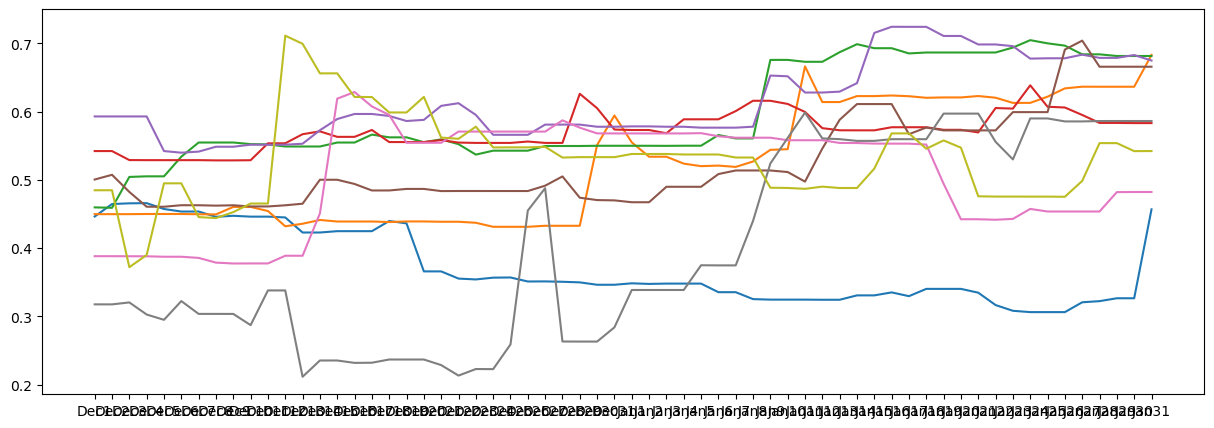

In [141]:
plt.figure(figsize=(15,5))
plt.plot(dates,snowarea1)
plt.plot(dates,snowarea2)
plt.plot(dates,snowarea3)
plt.plot(dates,snowarea4)
plt.plot(dates,snowarea5)
plt.plot(dates,snowarea6)
plt.plot(dates,snowarea7)
plt.plot(dates,snowarea8)
plt.plot(dates,snowarea9)
plt.plot(dates,snowarea10)
plt.tick_params(axis='x', rotation=55, labelsize=7)
plt.title('Relative Snow cover area of NWH in Dec & Jan from 2015 to 2024')
plt.xlabel('Dates', fontsize=10)
plt.xticks(rotation=45)
plt.xticks(dates[::2])    # to plot 
plt.ylabel('Relative Snow Cover Area')
plt.legend(years,loc = 'upper center', fontsize='small')
# plt.savefig('F:\IIRS\Course material\Mod 4 - Scientific Geocomputing\Project\Data\Output\_area.png')
plt.show()

In [142]:
min(snowarea1)
max(snowarea1)

0.466071970942013

ValueError: x and y must have same first dimension, but have shapes (23,) and (46,)

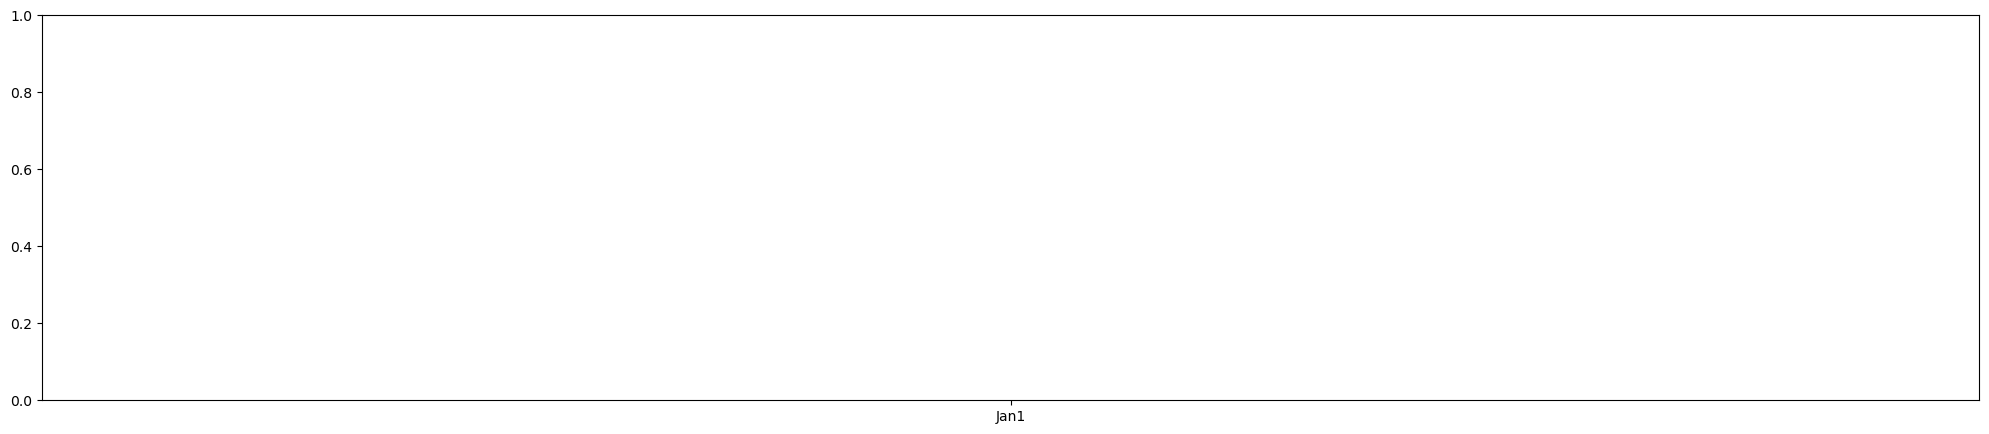

In [66]:
plt.figure(figsize=(25,5))
plt.plot(dates,snowarea)
plt.show()

# Example

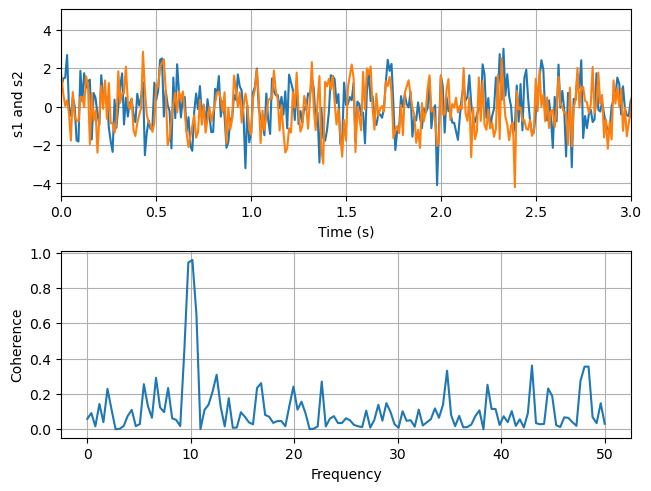

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10 Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 3)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('Coherence')

plt.show()